<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 5 - Cambios Estructurales - Intervenciones </h3>
    <h3>Ejercicio 3_Sincronico_opcional</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno, Drago Braian <p>
</div>

**Cambios Estructurales**  

En el análisis de series de tiempo, los cambios estructurales representan shocks que impactan la evolución en el tiempo del proceso de generación de datos. Esto es relevante porque uno de los supuestos clave de la metodología Box-Jenkins es que la estructura del proceso de generación de datos no cambia con el tiempo. ¿Cómo se pueden identificar los cambios estructurales? El paquete strucchange puede ayudar en eso y el presente tutorial muestra cómo.

**Objetivo del Ejercicio**: Introducción a la intervención de las series temporales mediante la identificación de cambios estructurales.  

1- Herramientas Generales  
2- Ejemplo aplicado

In [ ]:
# Load R
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [ ]:
%%R
#install.packages('strucchange')
#install.packages('fUnitRoots')
#install.packages('astsa')
#install.packages('ggplot2')
#install.packages('ggfortify')
#install.packages('lmtest')
#install.packages('readr')
#install.packages('tidyr')
#install.packages('forecast')
#install.packages('astsa')
#install.packages('tseries')

In [ ]:
%%R
suppressPackageStartupMessages(library(strucchange))
suppressPackageStartupMessages(library(fUnitRoots))
suppressPackageStartupMessages(library(astsa))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggfortify))
suppressPackageStartupMessages(library(lmtest))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(forecast))
suppressPackageStartupMessages(library(astsa))
suppressPackageStartupMessages(library(tseries))

**El conjunto de datos globtemp informa el desvío (en grados centígrados) de la temperatura media global entre la tierra y el océano [1880-2015].**

In [ ]:
%%R
data("globtemp")
globtemp

Time Series:
Start = 1880 
End = 2015 
Frequency = 1 
  [1] -0.20 -0.11 -0.10 -0.20 -0.28 -0.31 -0.30 -0.33 -0.20 -0.11 -0.37 -0.24
 [13] -0.27 -0.30 -0.31 -0.22 -0.15 -0.11 -0.28 -0.16 -0.09 -0.15 -0.28 -0.36
 [25] -0.45 -0.28 -0.23 -0.40 -0.44 -0.47 -0.43 -0.44 -0.35 -0.35 -0.16 -0.11
 [37] -0.33 -0.40 -0.26 -0.23 -0.26 -0.21 -0.27 -0.24 -0.28 -0.20 -0.09 -0.20
 [49] -0.21 -0.36 -0.13 -0.09 -0.17 -0.28 -0.13 -0.19 -0.15 -0.02 -0.02 -0.03
 [61]  0.08  0.13  0.10  0.14  0.26  0.12 -0.03 -0.04 -0.09 -0.09 -0.17 -0.06
 [73]  0.01  0.08 -0.12 -0.14 -0.20  0.03  0.06  0.03 -0.03  0.05  0.02  0.06
 [85] -0.20 -0.10 -0.05 -0.02 -0.07  0.07  0.03 -0.09  0.01  0.15 -0.08 -0.01
 [97] -0.11  0.18  0.07  0.16  0.27  0.32  0.13  0.31  0.16  0.12  0.19  0.33
[109]  0.40  0.28  0.44  0.42  0.23  0.24  0.32  0.46  0.34  0.48  0.63  0.42
[121]  0.42  0.55  0.63  0.62  0.55  0.69  0.63  0.66  0.54  0.64  0.72  0.60
[133]  0.63  0.66  0.75  0.87


In [ ]:
%%R
summary(globtemp)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.47000 -0.21000 -0.07500  0.01838  0.18250  0.87000 


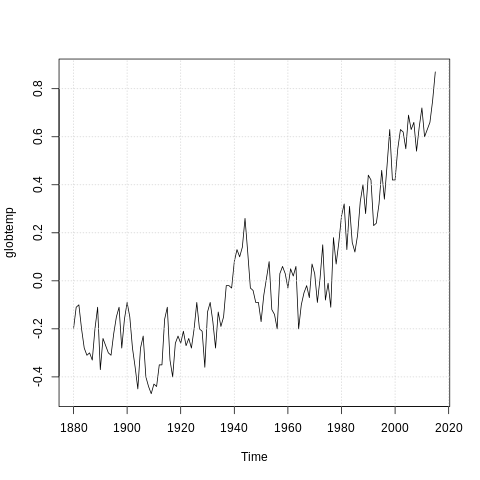

In [ ]:
%%R
plot(globtemp)
grid()

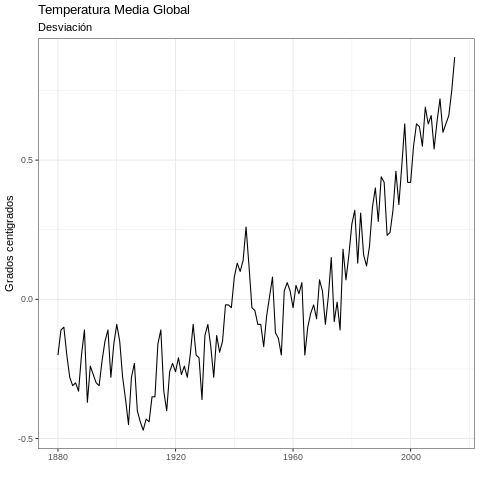

In [ ]:
## VISUALIZACI?N DE LA SERIE
%%R
autoplot(globtemp) +
  ggtitle("Temperatura Media Global", subtitle = "Desviación") +
  ylab("Grados centigrados") + theme_bw()

Podemos ver un aumento notable de las desviaciones de temperatura en las últimas décadas. La serie temporal de globtemp parece no estacionaria debido básicamente a la tendencia ascendente de las últimas décadas. Un gráfico de globtemp frente a su ajuste suavizado puede ayudar a comprenderlo mejor.

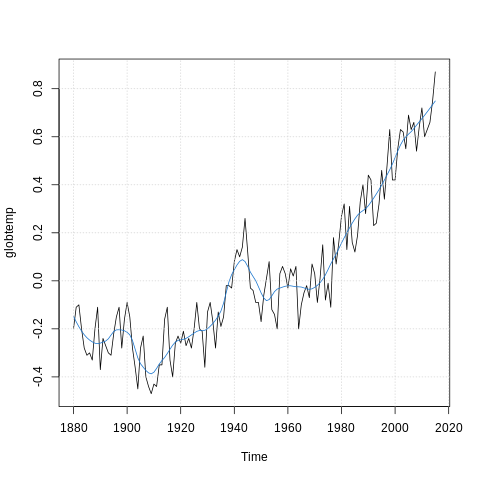

In [ ]:
%%R
tt <- 1:length(globtemp)
fit <- ts(loess(globtemp ~ tt, span = 0.2)$fitted, start = 1880, frequency = 1)
plot(globtemp, type='l')
lines(fit, col = 4)
grid()

## DETECCION DE CAMBIOS ESTRUCTURALES

#### - Cambios estructurales de nivel
#### - Tendencia a cambios estructurales
#### - Cambios estructurales de ajuste polinomial

Si hay quiebres estructurales, es posible encontrar m puntos de ruptura que minimicen la suma de cuadrados residual (RSS) asociada a un modelo con m+1 segmentos dado un tamaño mínimo de segmento de h·n observaciones.   
Dado que el número de puntos de interrupción m no se conoce de antemano, es necesario calcular los puntos de interrupción óptimos para m = 0, 1,… rupturas y elegir el modelo que minimice algún criterio de información como BIC.  
(Para eso utilizamos la librería Breakpoints)


**Level Structural Changes**

In [ ]:
%%R
summary(lm(globtemp ~ 1))


Call:
lm(formula = globtemp ~ 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48838 -0.22838 -0.09338  0.16412  0.85162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.01838    0.02721   0.676      0.5

Residual standard error: 0.3173 on 135 degrees of freedom



El coeficiente de intersección no es significativo, probablemente debido a la tendencia ascendente observada en las últimas décadas. Luego acortamos nuestra serie de tiempo y ejecutamos nuevamente la misma regresión.

In [ ]:
%%R
globtemp_win <- window(globtemp, end = 2000)
lev_fit <- lm(globtemp_win ~ 1)
summary(lev_fit)


Call:
lm(formula = globtemp_win ~ 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41017 -0.17017 -0.04017  0.13983  0.68983 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.05983    0.02161  -2.769  0.00652 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2377 on 120 degrees of freedom



El coeficiente de intersección ahora se informa como significativo. Tracemos la serie de tiempo contra el ajuste.

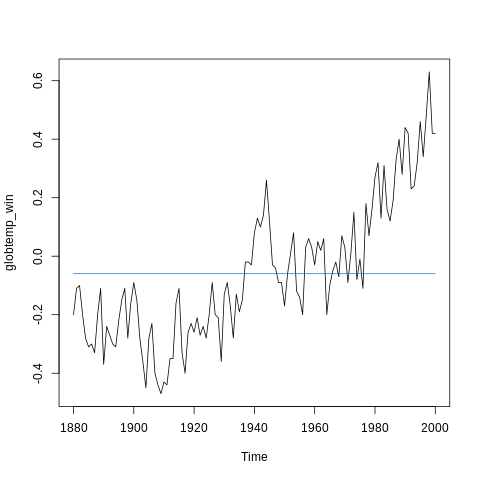

In [ ]:
%%R
plot(globtemp_win)
lines(ts(fitted(lev_fit), start = 1880, frequency = 1), col = 4)

Determinación de los puntos de corte

In [ ]:
%%R
globtemp_brk <- breakpoints(globtemp_win ~ 1, h = 0.1)
summary(globtemp_brk)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = globtemp_win ~ 1, h = 0.1)

Breakpoints at observation number:
                                    
m = 1                        97     
m = 2               57       100    
m = 3               57       97  109
m = 4      22 34    57       100    
m = 5      22 34    57       97  109
m = 6      22 34    57 69    97  109
m = 7      22 34    57 69 81 97  109
m = 8      22 34 46 58 70 85 97  109
m = 9   12 24 36 48 60 72 84 97  109

Corresponding to breakdates:
                                                    
m = 1                                      1976     
m = 2                       1936           1979     
m = 3                       1936           1976 1988
m = 4        1901 1913      1936           1979     
m = 5        1901 1913      1936           1976 1988
m = 6        1901 1913      1936 1948      1976 1988
m = 7        1901 1913      1936 1948 1960 1976 1988
m = 8        1901 1913 1925 1937 1949 1

"m" representa el número de segmentos en los que se divide la serie.  
Por ejemplo, cuando m = 1, se detectó un punto de quiebre en la observación número 97.  
El objetivo es encontrar un equilibrio entre un buen ajuste y la simplicidad del modelo.

Arriba se muestran los resultados de encontrar m = 1..9 puntos de interrupción con fechas asociadas y métricas {RSS, BIC}. El valor mínimo de BIC se alcanza para m = 5. Trazamos la salida de la función breakpoint() para obtener una comprensión visual.

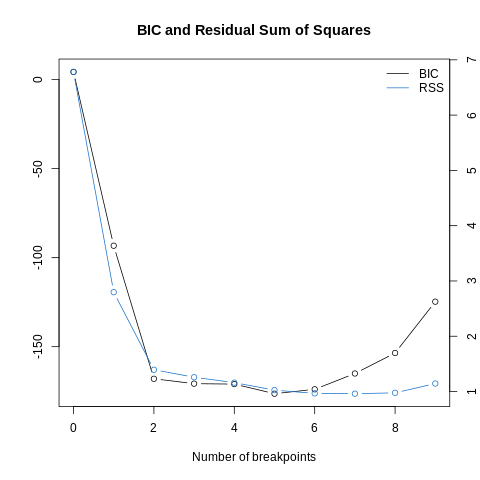

In [ ]:
%%R
plot(globtemp_brk)

La gráfica de las series temporales observadas y ajustadas, junto con los intervalos de confianza para los puntos de interrupción, viene dada por:

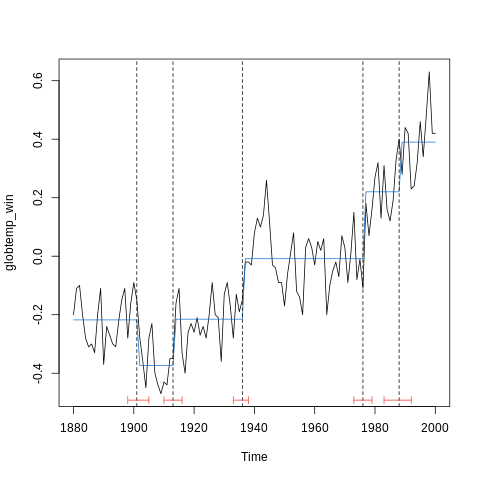

In [ ]:
%%R
plot(globtemp_win)
lines(fitted(globtemp_brk, breaks = 5), col = 4)
lines(confint(globtemp_brk, breaks = 5))

In [ ]:
%%R
breakdates(globtemp_brk, breaks = 5)

[1] 1901 1913 1936 1976 1988


In [ ]:
%%R
coef(globtemp_brk, breaks = 5)

            (Intercept)
1880 - 1901  -0.2177273
1902 - 1913  -0.3733333
1914 - 1936  -0.2152174
1937 - 1976  -0.0085000
1977 - 1988   0.2200000
1989 - 2000   0.3900000


**Trend Structural Changes**

Se modelizan mediante la siguiente fórmula:  

**tt** hace referencia al timeline

In [ ]:
%%R
l <- length(globtemp)
tt <- 1:l      ## línea de tiempo
trend_fit <- lm(globtemp ~ tt)
summary(trend_fit)


Call:
lm(formula = globtemp ~ tt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33363 -0.11470 -0.02466  0.11932  0.38017 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.4600523  0.0273468  -16.82   <2e-16 ***
tt           0.0069844  0.0003464   20.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1586 on 134 degrees of freedom
Multiple R-squared:  0.7521,	Adjusted R-squared:  0.7503 
F-statistic: 406.6 on 1 and 134 DF,  p-value: < 2.2e-16



Tanto los coeficientes de intersección como de tendencia se informan como significativos. Tracemos la serie de tiempo contra el ajuste.

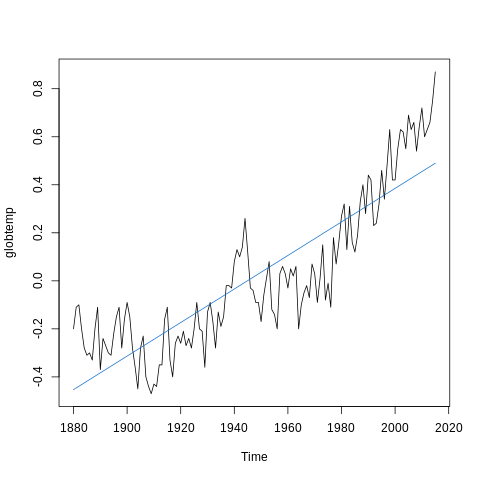

In [ ]:
%%R
plot(globtemp)
lines(ts(fitted(trend_fit), start=1880, frequency = 1), col = 4)

Continuamos con la búsqueda de cambios estructurales

In [ ]:
%%R
globtemp_brk <- breakpoints(globtemp ~ tt, h = 0.1)
summary(globtemp_brk)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = globtemp ~ tt, h = 0.1)

Breakpoints at observation number:
                                    
m = 1                  84           
m = 2      23          84           
m = 3      27       66 84           
m = 4      23    53 66 84           
m = 5   16 32    53 66 84           
m = 6   16 32    53 66 84 97        
m = 7   16 32    53 66 84 97     117
m = 8   16 32    53 66 84 97 110 123
m = 9   14 27 40 53 66 84 97 110 123

Corresponding to breakdates:
                                                    
m = 1                            1963               
m = 2        1902                1963               
m = 3        1906           1945 1963               
m = 4        1902      1932 1945 1963               
m = 5   1895 1911      1932 1945 1963               
m = 6   1895 1911      1932 1945 1963 1976          
m = 7   1895 1911      1932 1945 1963 1976      1996
m = 8   1895 1911      1932 1945 1963 1976

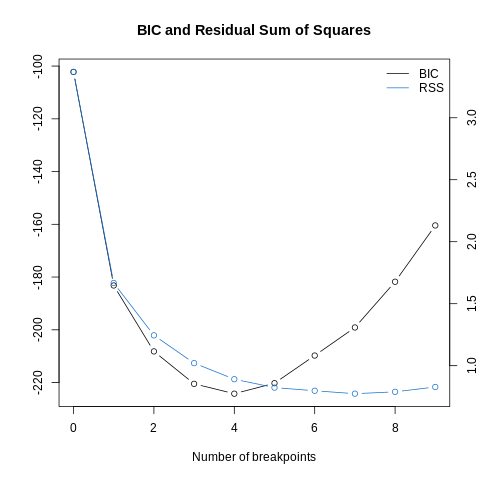

In [ ]:
%%R
plot(globtemp_brk)

Donde encontramos el mínimo BIC?

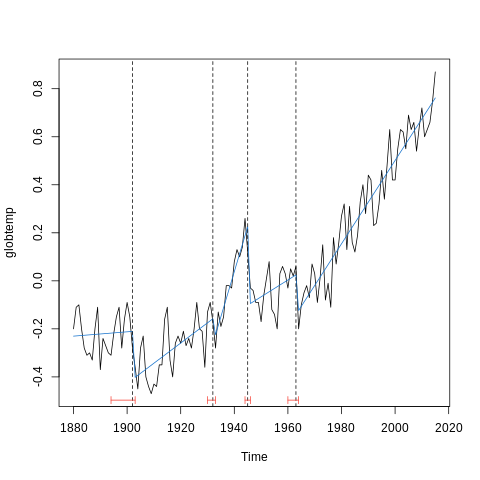

In [ ]:
%%R
plot(globtemp)
lines(fitted(globtemp_brk, breaks = 4), col = 4)
lines(confint(globtemp_brk, breaks = 4))

In [ ]:
%%R
breakdates(globtemp_brk, breaks = 4)

[1] 1902 1932 1945 1963


**Polinomial Fit Structural Changes**

Los cambios estructurales del polinomio de segundo grado se pueden determinar con la ayuda de la siguiente fórmula:  

**globtemp ~ tt + I(tt^2)**

Una vez más, primero debemos verificar que dicha regresión tiene sentido para nuestra serie temporal evaluando la significancia de los coeficientes.

In [ ]:
%%R
pol_fit <- lm(globtemp ~ tt + I(tt^2))
summary(pol_fit)


Call:
lm(formula = globtemp ~ tt + I(tt^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27014 -0.08379  0.00685  0.07299  0.38625 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.124e-01  3.015e-02  -7.045 9.02e-11 ***
tt          -3.784e-03  1.016e-03  -3.725 0.000288 ***
I(tt^2)      7.860e-05  7.183e-06  10.943  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1155 on 133 degrees of freedom
Multiple R-squared:  0.8696,	Adjusted R-squared:  0.8676 
F-statistic: 443.3 on 2 and 133 DF,  p-value: < 2.2e-16



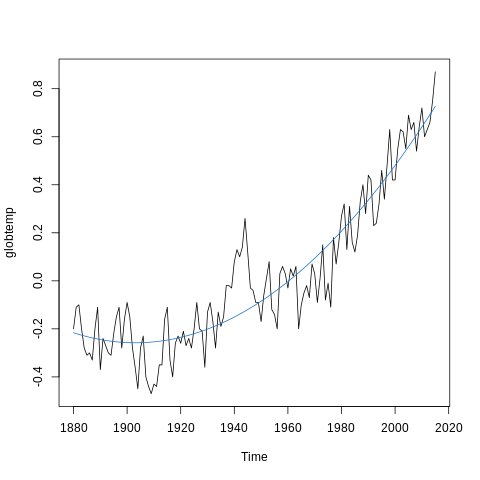

In [ ]:
%%R
plot(globtemp, type = 'l')
lines(ts(fitted(pol_fit), start = 1880, frequency = 1), col = 4)

In [ ]:
%%R
globtemp_brk <- breakpoints(globtemp ~ tt + I(tt^2), data = globtemp, h = 0.1)
summary(globtemp_brk)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = globtemp ~ tt + I(tt^2), h = 0.1, 
    data = globtemp)

Breakpoints at observation number:
                                    
m = 1               66              
m = 2   22          66              
m = 3   22          66 84           
m = 4   20 36       66 84           
m = 5   20 36       66 84 97        
m = 6   20 36    53 66 84 97        
m = 7   20 36    53 66 84 97 112    
m = 8   20 36    53 66 84 97 110 123
m = 9   19 32 45 58 71 84 97 110 123

Corresponding to breakdates:
                                                    
m = 1                       1945                    
m = 2   1901                1945                    
m = 3   1901                1945 1963               
m = 4   1899 1915           1945 1963               
m = 5   1899 1915           1945 1963 1976          
m = 6   1899 1915      1932 1945 1963 1976          
m = 7   1899 1915      1932 1945 1963 1976 1991     
m = 8   18

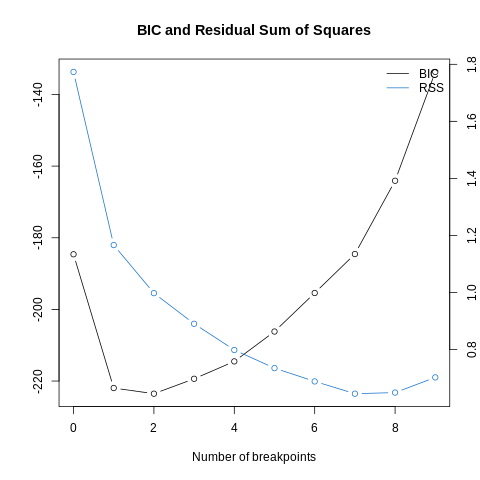

In [ ]:
%%R
plot(globtemp_brk)

BIC mínimo en break=2

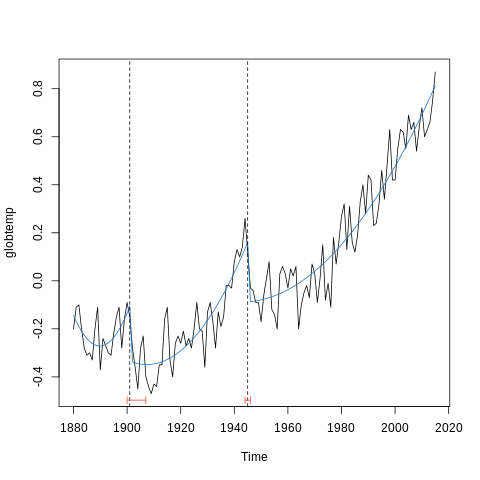

In [ ]:
%%R
plot(globtemp)
lines(fitted(globtemp_brk, breaks = 2), col = 4)
lines(confint(globtemp_brk, breaks = 2))

In [ ]:
%%R
breakdates(globtemp_brk, breaks = 2)

[1] 1901 1945


**Prueba de Intervención en ARIMA para una Serie de tiempo**

Se propone realizar sobre la Serie *Estireno*:  

1. Verificar los quiebres significativos de la serie completa de ESTIRENO.    
2. Modelizar con ARIMA incorporando los comportamientos (quiebres   estructurales).  
3. Pronosticar y visualizar la Serie.   

In [ ]:
%%R
url= 'https://raw.githubusercontent.com/braiandrago/AST/main/Estireno_base.csv'
Estireno <- read.csv(file = url,
                    sep = ",",
                    header = T)

In [ ]:
%%R
head(Estireno)

     FECHA STYRENE.FOB.ARA.US..TON
1 1-1-2006                1143.416
2 2-1-2006                1106.048
3 3-1-2006                1015.880
4 4-1-2006                1023.926
5 5-1-2006                1127.322
6 6-1-2006                1269.188


In [ ]:
%%R
tamano <- dim(Estireno)

# Muestra el número de filas y columnas
cat("Número de filas:", tamano[1], "\n")
cat("Número de columnas:", tamano[2], "\n")

Número de filas: 195 
Número de columnas: 2 


In [ ]:
#Configurar la variable como serie/s de tiempo"
%%R
inds <- seq(as.Date("2006-01-01"), as.Date("2022-03-31"), by = "month")
estir_TS <- ts(Estireno$STYRENE.FOB.ARA.US..TON,
               start = c(2006,1),
               frequency = 12)

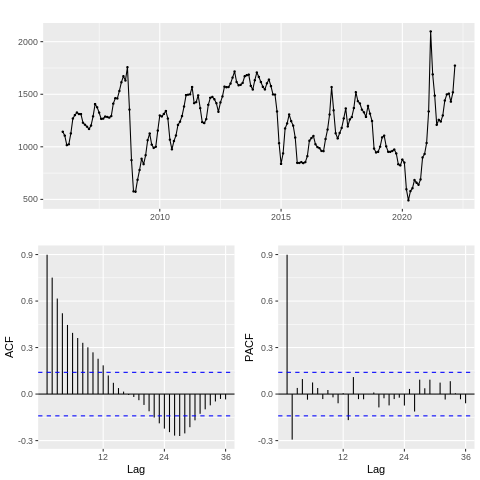

In [ ]:
%%R
estir_TS %>%ggtsdisplay()

En las gráficas anteriores se observa un decrecrecimiento lento y aproximadamente lineal que condice con los indicios de no estacionariedad

Veamos ndiff y estacionalidad...

In [ ]:
%%R
ndiffs(estir_TS)

[1] 0


In [ ]:
#%%R
#estir_TS %>%
#  adf.test()

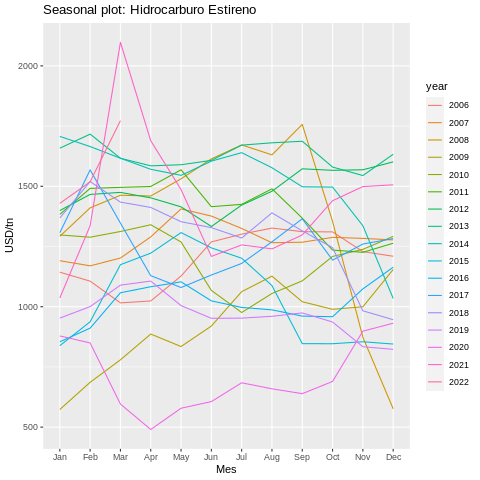

In [ ]:
%%R
b1<- ggseasonplot(estir_TS,"PLOT SARIMA")+
  labs(title = "Seasonal plot: Hidrocarburo Estireno",
       x = "Mes", y = "USD/tn")
b1

**Modelización: Utilizamos Autoarima**

Con el objetivo de evaluar la generalización de los modelos, se dividirán las series en dos conjuntos. El conjunto de entrenamiento se utilizará para ajustar y seleccionar los modelos, mientras que el conjunto de prueba se destinará para llevar a cabo los pronósticos y evaluar así la performance de dichos modelos contra datos nunca vistos.

In [ ]:
%%R
h <- 4
estir_train <- head(estir_TS, length(estir_TS) - h)
estir_test <- tail(estir_TS, h)

In [ ]:
%%R
model_estir_train=auto.arima(estir_train,stepwise=FALSE,approximation=FALSE)
summary(model_estir_train)

Series: estir_train 
ARIMA(0,1,3) 

Coefficients:
         ma1      ma2      ma3
      0.3064  -0.0451  -0.2942
s.e.  0.0726   0.0824   0.0842

sigma^2 = 13299:  log likelihood = -1170.34
AIC=2348.68   AICc=2348.9   BIC=2361.67

Training set error measures:
                  ME     RMSE      MAE        MPE     MAPE      MASE       ACF1
Training set 1.71713 114.1066 73.14041 -0.3786612 6.287854 0.2577668 0.01790528


Con la serie original particionada en train y auto.arima se obtiene un modelo **ARIMA(0,1,3) con valor AIC=2348.68**


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)
Q* = 10.582, df = 21, p-value = 0.9703

Model df: 3.   Total lags used: 24



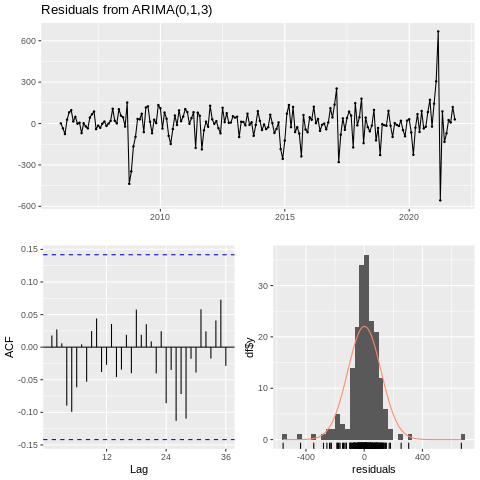

In [ ]:
%%R
checkresiduals(model_estir_train)

**Pronósticos**

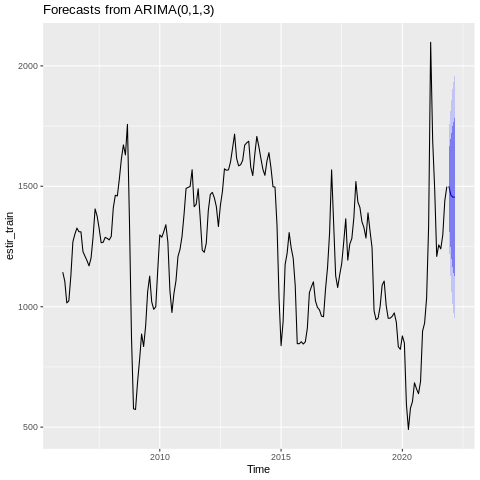

In [ ]:
%%R
forecast_estireno_tp1 <- stats::arima(estir_train, order=c(0,1,3))
fcast_est_tp1 <- forecast(forecast_estireno_tp1, h = h)
autoplot(fcast_est_tp1)

In [ ]:
%%R
fcast_est_tp1

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Dec 2021       1500.255 1353.637 1646.873 1276.0227 1724.488
Jan 2022       1463.613 1222.399 1704.827 1094.7087 1832.517
Feb 2022       1454.891 1150.943 1758.838  990.0429 1919.738
Mar 2022       1454.891 1119.495 1790.286  941.9477 1967.834


In [ ]:
# Calcular el error cuadrático medio (RMSE)
%%R
rmse <- sqrt(mean((fcast_est_tp1$mean - estir_test)^2))

# Calcular el error absoluto medio (MAE)
mae <- mean(abs(fcast_est_tp1$mean - estir_test))

# Calcular el error absoluto porcentual medio (MAPE)
mape <- mean(abs((fcast_est_tp1$mean - estir_test) / estir_test)) * 100

# Mostrar las métricas
cat("RMSE:", rmse, "\n")
cat("MAE:", mae, "\n")
cat("MAPE:", mape, "%\n")

RMSE: 162.93 
MAE: 105.4643 
MAPE: 6.232186 %


**Análisis de Intervención**

Se decide efectuar el análisis estimando una constante (intercepto) y posteriormente se calculan los quiebres estructurales utilizando la función de R-studio `breakpoints`.

Cuando se visualiza una serie con quiebres y se observa el punto donde cambia el nivel, se debe incorporar una variable que refleje el cambio del quiebre estructural.

In [ ]:
%%R
summary(lm(estir_TS ~ 1)) #Estimamos una constante (el intercepto)
coeftest(lm(estir_TS ~ 1))  ## COEFICIENTE SIGNIFICATIVO
estir_full<-lm(estir_TS ~ 1)

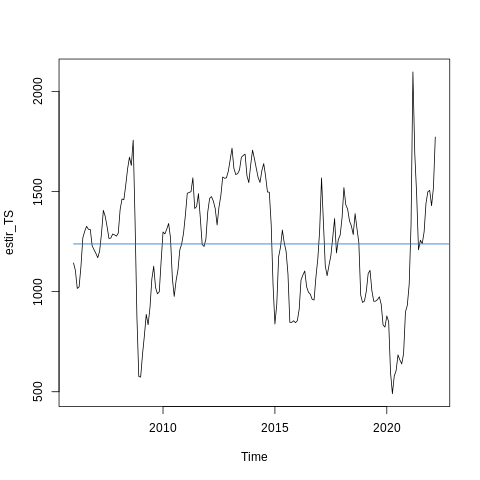

In [ ]:
%%R
plot(estir_TS)
lines(ts(fitted(estir_full), start = 2006, frequency = 1), col = 4)

In [ ]:
## Determinación los puntos de corte
%%R
estir_brk <- breakpoints(estir_TS ~ 1, h = 0.1)
summary(estir_brk)


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = estir_TS ~ 1, h = 0.1)

Breakpoints at observation number:
                                      
m = 1                  107            
m = 2         60       107            
m = 3      34 59       107            
m = 4         60       106     154 176
m = 5      34 59       106     154 176
m = 6      34 59       107 131 154 176
m = 7      34 57 80    107 131 154 176
m = 8   19 38 59 80    107 131 154 176
m = 9   19 38 57 76 95 114 133 154 176

Corresponding to breakdates:
                                                                             
m = 1                                              2014(11)                  
m = 2                    2010(12)                  2014(11)                  
m = 3           2008(10) 2010(11)                  2014(11)                  
m = 4                    2010(12)                  2014(10)          2018(10)
m = 5           2008(10) 2010(11)                  2014(1

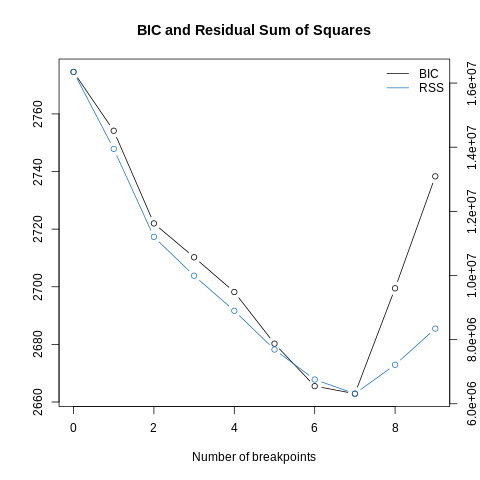

In [ ]:
%%R
plot(estir_brk)

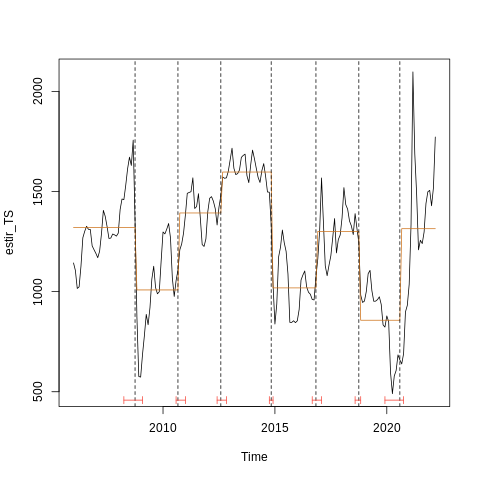

In [ ]:
%%R
plot(estir_TS)
lines(fitted(estir_brk, breaks = 7), col = 7)
lines(confint(estir_brk, breaks = 7))

In [ ]:
%%R
breakdates(estir_brk, breaks = 7)

[1] 2008.750 2010.667 2012.583 2014.833 2016.833 2018.750 2020.583


In [ ]:
%%R
coef(estir_brk, breaks = 7)

                    (Intercept)
2006(1) - 2008(10)    1320.5846
2008(11) - 2010(9)    1008.5452
2010(10) - 2012(8)    1393.0580
2012(9) - 2014(11)    1597.5634
2014(12) - 2016(11)   1018.8267
2016(12) - 2018(10)   1301.2336
2018(11) - 2020(8)     857.1384
2020(9) - 2022(3)     1314.4208


In [ ]:
%%R
estir_brk$breakpoints[4]

fitted.ts <- fitted(estir_brk, breaks = 7)
unique(as.integer(fitted.ts))
breakdates(estir_brk, breaks = 7)

[1] 2008.750 2010.667 2012.583 2014.833 2016.833 2018.750 2020.583


Se procede a realizar un modelo ARIMA que contenga, por una parte, las componentes utilizadas en las verificaciones anteriores y además se incorpora un regresor externo que refleja los comportamientos (cambios de Nivel) a lo largo de la serie. Además, se verifican los residuos del modelo los cuales resultan incorrelacionados.

In [ ]:
#guarda los saltos (quiebres estructurales) para luego ajustar el modelo con este xreg
%%R
fitted.ts <- fitted(estir_brk, breaks = 7)


	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,1,3) errors
Q* = 11.823, df = 21, p-value = 0.9443

Model df: 3.   Total lags used: 24


	Box-Ljung test

data:  residuals(estireno_xreg)
X-squared = 10.067, df = 20, p-value = 0.9669



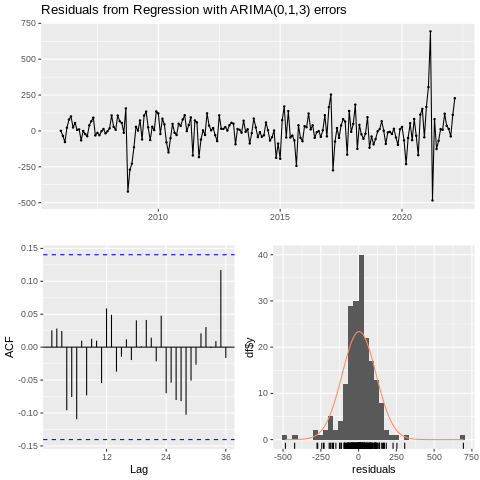

In [ ]:
## CAMBIO ESTRUCTURAL - MODELO ARIMA
%%R
estireno_xreg <-Arima(estir_TS, order = c(0,1,3), xreg = fitted.ts, include.mean = TRUE)
summary(estireno_xreg)
coeftest(estireno_xreg)
#fitted.ts 0.0005774 *** es significativo (la funcion de dummies)
checkresiduals(estireno_xreg)
# LjungBoxTest(residuals(estireno_xreg), k=1, lag.max=20)
Box.test(residuals(estireno_xreg), lag = 20, type = "Ljung-Box")
#p-value > 0.051, por lo tanto los Residuos incorrelacionados

Pronósticos

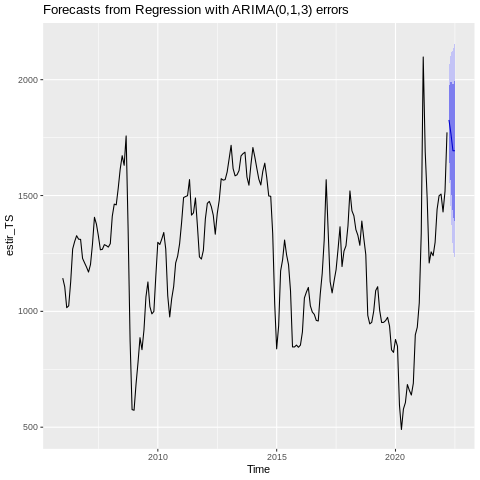

In [ ]:
%%R
h_fut<- 4
fcast2 <- forecast(estireno_xreg, h = h_fut,xreg = rep(fitted.ts[195], h_fut))
autoplot(fcast2)

In [ ]:
%%R
fcast2

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Apr 2022       1826.151 1680.981 1971.321 1604.133 2048.170
May 2022       1766.212 1535.708 1996.716 1413.686 2118.738
Jun 2022       1693.182 1410.523 1975.842 1260.892 2125.473
Jul 2022       1693.182 1387.209 1999.155 1225.237 2161.128
